#A - Objective and Overview

**Objective**

The objective of this analysis is to determine if models created using the Early Warning and Cardio Specific Subsets can predict the presence of heart disease with similar performance to models created with the Full Workup Set. If it is possible to create high performing models with less and easier to obtain predictor data, healthcare providers may be able to detect the presence of heart disease earlier and without the need for expensive and invasive tests.


**Data Source**

Cleveland, Hungary, Switzerland, and VA Long Beach heart disease data were downloaded from https://archive.ics.uci.edu/ml/datasets/heart+disease and combined into a single .csv named 'uci_heart.csv'

uci_heart.csv includes (from https://archive.ics.uci.edu/ml/datasets/heart+disease):
*   processed.switzerland.data
*   processed.va.data
*   processed.hungarian.data
*   processed.cleveland.data

**Predictors:**
1. age - age in years
2. sex - sex (1 = male; 0 = female)
3. cp - chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2 =showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

**Target:**
14. target - diagnosis of heart disease (0 = heart disease not present, 1 = heart disease present)


**Predictor Subsets:**

*Early Warning Subset* - contains predictors that are innate or can be obtained through a routine physical and bloodwork.
*   age
*   sex
*   cp
*   trestbps
*   chol
*   fbs

*Cardio Specific Subset* - contains predictors that are measured by a stress test and electrocardiograph in addition to the Early Warning Subset. Requires
looking for heart disease specifically.
*   age
*   sex
*   cp
*   trestbps
*   chol
*   fbs
*   restecg
*   thalach
*   exang
*   oldpeak
*   slope

*Full Workup Set* - contains all predictors. This set includes predictors which require time consuming, invasive, and/or expensive radiological
tests in addition to the Cardio Specific Subset subset.
*   age
*   sex
*   cp
*   trestbps
*   chol
*   fbs
*   restecg
*   thalach
*   exang
*   oldpeak
*   slope
*   ca
*   thal

#B - Setup and Data Exploration

##1.0 Import Libraries and Read Dataset

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [ ]:
#Read in dataset
df = pd.read_csv('uci_heart.csv', header = 0)

##2.0 Preview Data

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67,1,4,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67,1,4,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,860.000000,718.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,53.510870,0.789130,3.250000,132.286047,246.832869,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652
std,9.424685,0.408148,0.930969,18.536175,58.527062,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,210.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,239.500000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,276.750000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Observing the distributions of the predictors, standardization will be performed to ensure predictors are on the same scale.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  860 non-null    float64
 4   chol      718 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 100.8 KB


Observing the non null counts, many of the predictors have entries containing null values. The entries that contain predictors with null values will be dropped in the preprocessing section.

##3.0 Data Preprocessing

###3.1 Drop Nulls

In [ ]:
count_nan = df.isnull().sum()

print(count_nan)

age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 831
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    float64
 6   restecg   299 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     299 non-null    float64
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    float64
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 35.0 KB


###3.2 Feature Engineering

In [ ]:
df['target'].replace([2, 3, 4], 1, inplace = True)

Target values of 1, 2, 3, and 4 indicated varying presence of heart disease. Values of 2, 3, and 4 were replaced with 1 to be consistent with Cleveland experiments cited on https://archive.ics.uci.edu/ml/datasets/heart+disease. 

0 = no presence of heart disease and 1 = heart disease present

In [ ]:
le = LabelEncoder()

#df['sex'] = le.fit_transform(df['sex']);
#df['cp'] = le.fit_transform(df['cp']);

df['restecg'] = le.fit_transform(df['restecg']);
df['fbs'] = le.fit_transform(df['fbs']);
df['exang'] = le.fit_transform(df['exang']);
df['slope'] = le.fit_transform(df['slope']);

#df['target'] = le.fit_transform(df['target']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 831
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    int64  
 2   cp        299 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    int64  
 6   restecg   299 non-null    int64  
 7   thalach   299 non-null    float64
 8   exang     299 non-null    int64  
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      299 non-null    float64
 13  target    299 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 35.0 KB


##4.0 Exploratory Data Analysis (EDA)

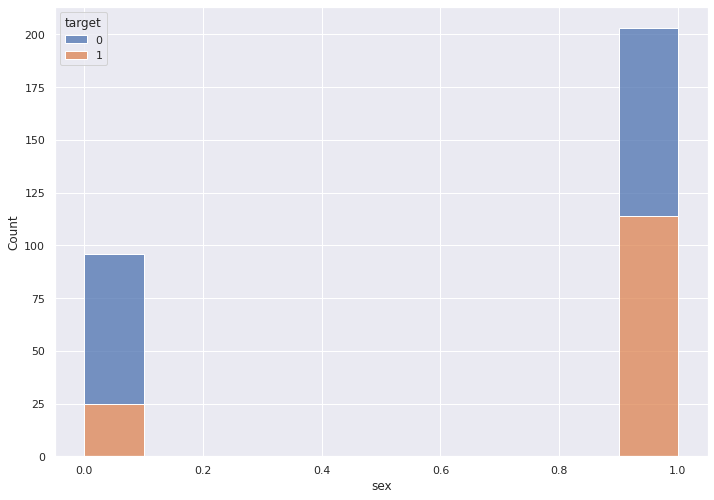

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.histplot(data=df, x='sex', hue="target", multiple="stack")

Observing the sex histogram, it can be concluded that heart disease is more prevalent in males than females (sex = 1, target = 1)

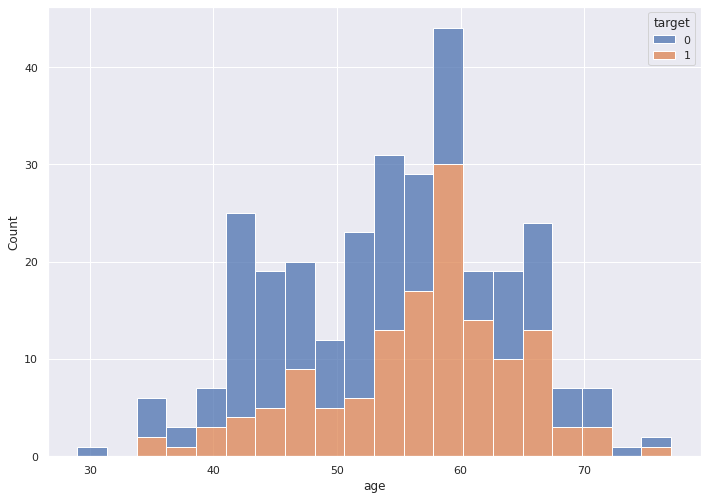

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.histplot(data=df, x='age', hue="target", multiple="stack", bins = 20)

Observing the age histogram, it can be concluded that heart disease is more prevalent as patients age, particularly above the age of 55. 

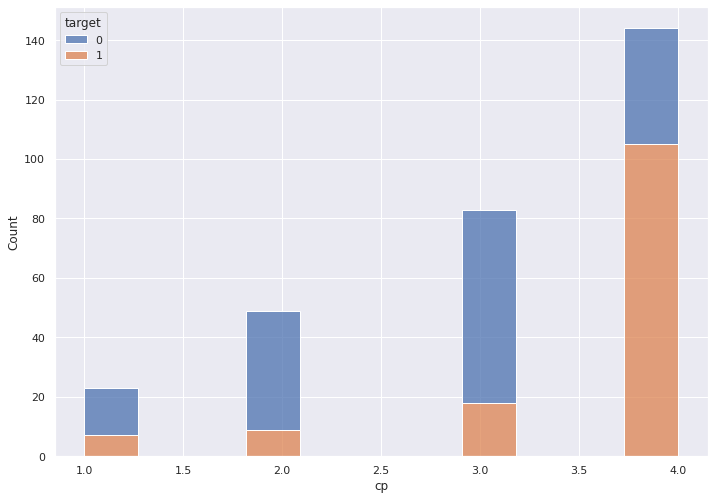

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.histplot(data=df, x='cp', hue="target", multiple="stack")

Observing the chest pain histogram, it can be concluded that heart disease presents without chest pain frequently (cp = 3, target = 1)

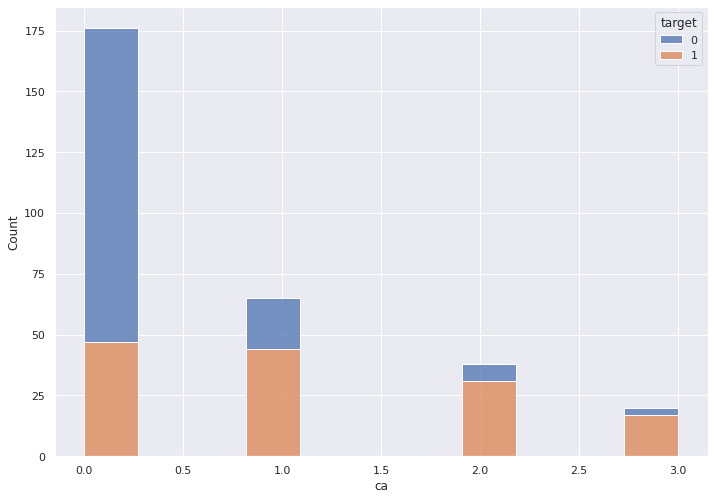

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.histplot(data=df, x='ca', hue="target", multiple="stack")

Observing the number of major vessels colored by flourosopy (ca) histogram, it can be concluded that the liklihood of heart disease increases as the number of major blood vessels colored by flouroscopy increases

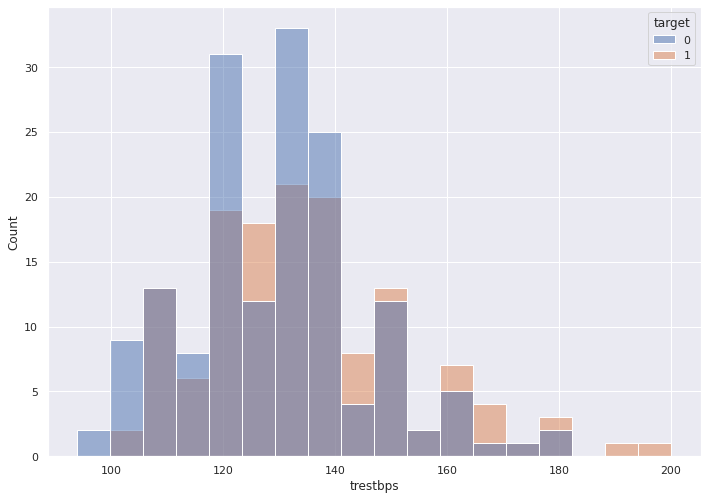

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.histplot(data=df, x='trestbps', hue="target")

Observing the resting blood pressure (trestbps) histogram, it can be concluded that the liklihood of heart disease increases as resting blood pressure increases, particularly above 140mmHg

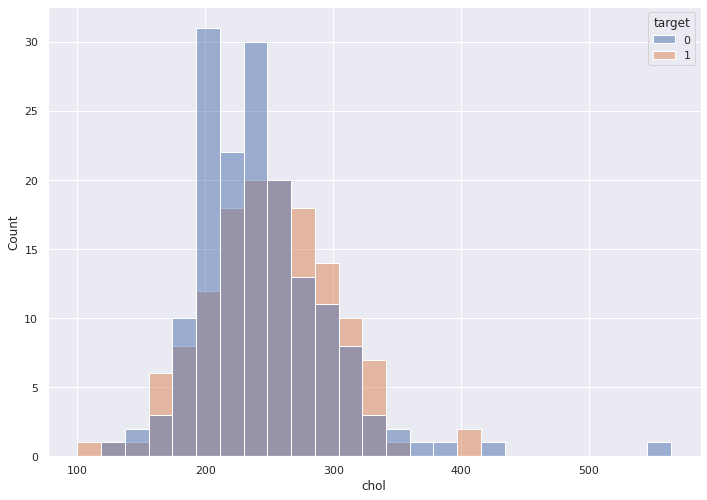

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.histplot(data=df, x='chol', hue="target")

Observing the cholesterol (chol) histogram, there is not an apparent correlation between cholesterol levels and the presence of heart disease

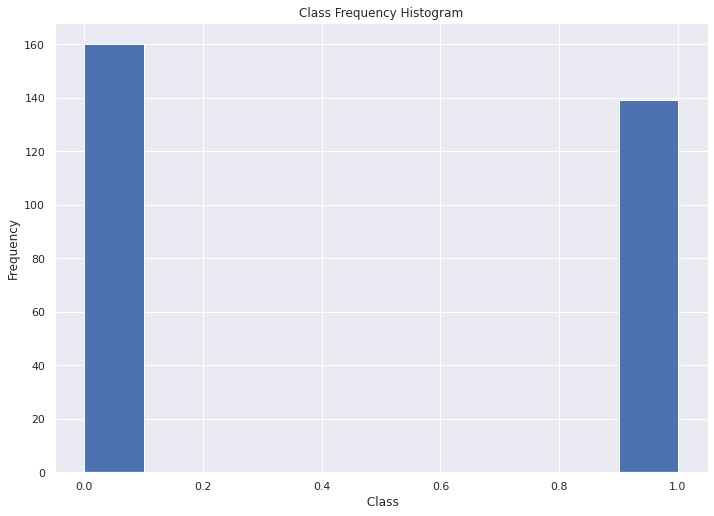

In [ ]:
import matplotlib.pyplot as plt

# Plot Histogram
x = df['target']
plt.hist(x, bins=10)
plt.gca().set(title='Class Frequency Histogram', xlabel = ' Class', ylabel='Frequency');

Observing the frequency of the classes, class imbalance is not present

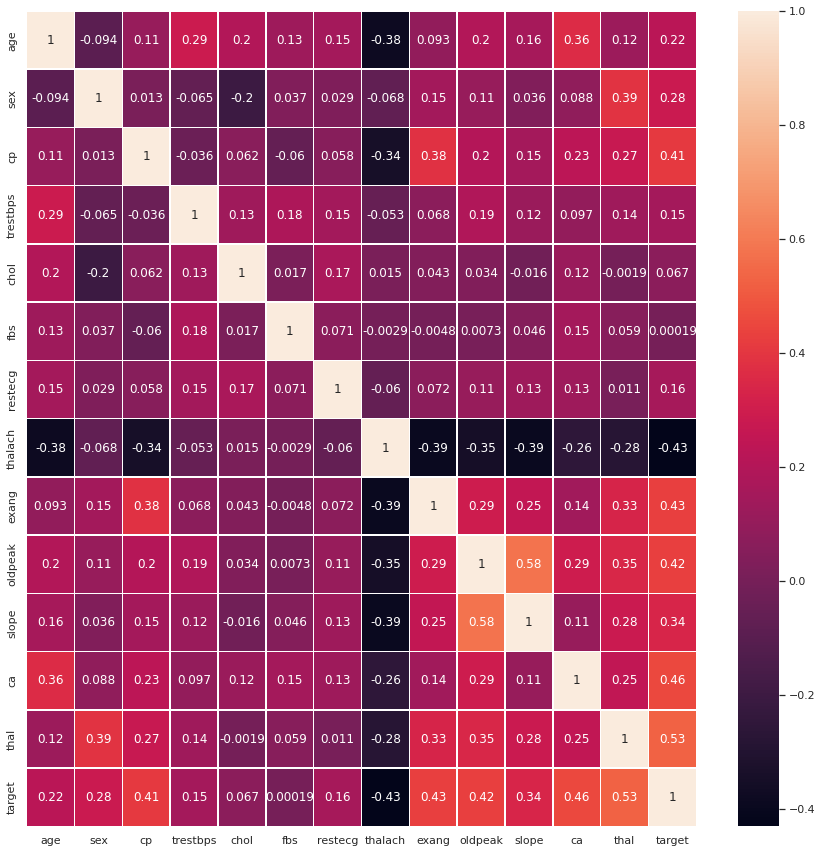

In [ ]:
f,ax = plt.subplots(figsize=(15, 15))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,linewidths=.5,ax=ax)
plt.show()

Observing the correlation matrix, the predictors with the strongest correlation to the target are thal, ca, exang, thalach, and oldpeak. Chol and fbs have virtually no correlation to the target.

#C - Create Train/Test Sets

##Create Predictor Sets

In [ ]:
#Creating predictors subsets
early_warning_predictors = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs']]
cardio_specific_predictors = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach',	'exang',	'oldpeak', 'slope']]
full_workup_predictors = df.drop(['target'], axis = 1)
target = df['target']

In [ ]:
#Creating train and test sets
np.random.seed(0)
early_warning_X_train, early_warning_X_test, early_warning_y_train, early_warning_y_test = train_test_split(early_warning_predictors, target, test_size=0.30)

cardio_specific_X_train, cardio_specific_X_test, cardio_specific_y_train, cardio_specific_y_test = train_test_split(cardio_specific_predictors, target, test_size=0.30)

full_workup_X_train, full_workup_X_test, full_workup_y_train, full_workup_y_test = train_test_split(full_workup_predictors, target, test_size=0.30)

#D - Density Plots and Feature Standardization

## Density Plots Pre-Standardization

Text(0.5, 1.0, 'Early Warning Predictors Density Plot')

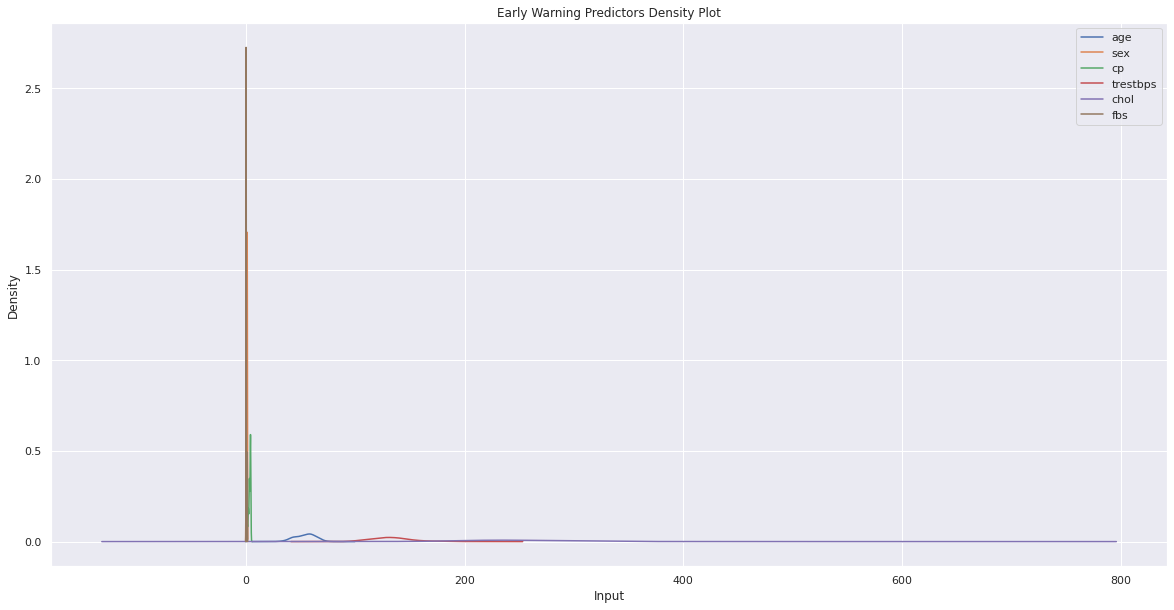

In [ ]:
#density plot of inputs
early_warning_X_train.plot.density(figsize = (20, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Early Warning Predictors Density Plot")

Text(0.5, 1.0, 'Cardio Specific Predictors Density Plot')

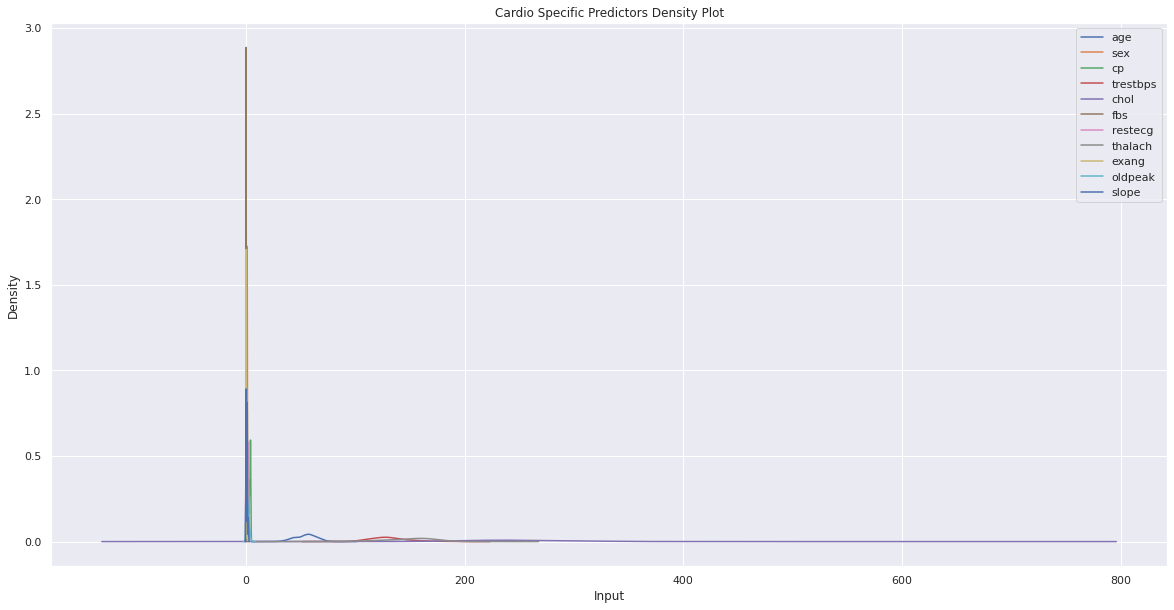

In [ ]:
#density plot of inputs
cardio_specific_X_train.plot.density(figsize = (20, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Cardio Specific Predictors Density Plot")

Text(0.5, 1.0, 'Full Workup Predictors Density Plot')

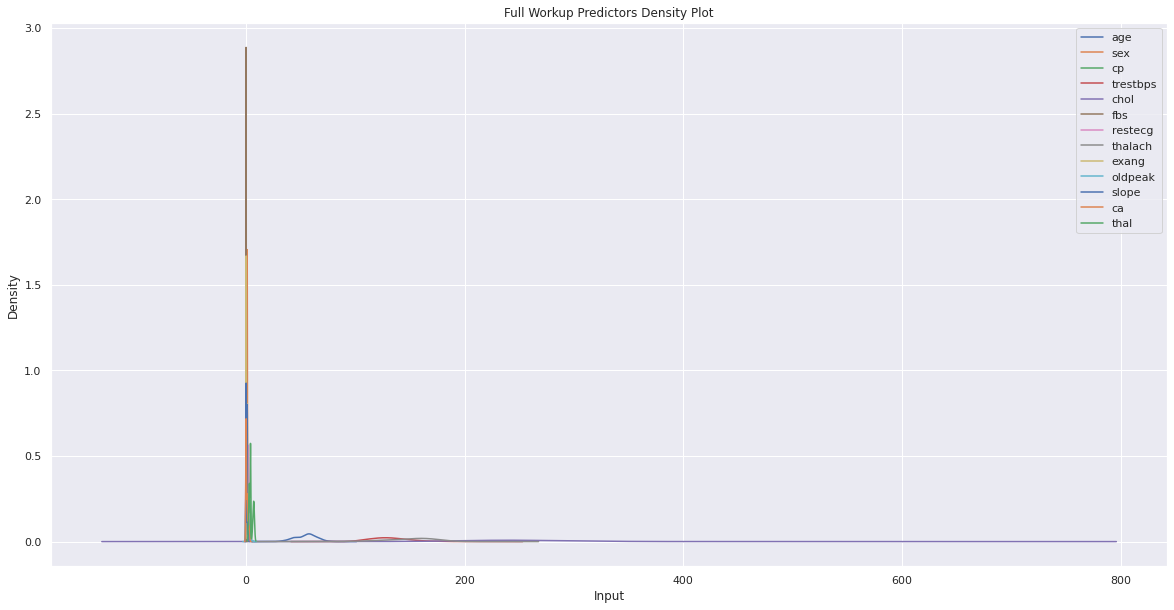

In [ ]:
#density plot of inputs
full_workup_X_train.plot.density(figsize = (20, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Full Workup Predictors Density Plot")

##Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# create scaler
scaler = StandardScaler()

# fit and transform
standard_early_warning_X_train = scaler.fit_transform(early_warning_X_train)
standard_early_warning_X_test = scaler.fit_transform(early_warning_X_test)

standard_cardio_specific_X_train= scaler.fit_transform(cardio_specific_X_train)
standard_cardio_specific_X_test = scaler.fit_transform(cardio_specific_X_test)

standard_full_workup_X_train = scaler.fit_transform(full_workup_X_train)
standard_full_workup_X_test = scaler.fit_transform(full_workup_X_test)


standard_early_warning_X_train_df = pd.DataFrame(standard_early_warning_X_train)
standard_early_warning_X_test_df = pd.DataFrame(standard_early_warning_X_test)

standard_cardio_specific_X_train_df = pd.DataFrame(standard_cardio_specific_X_train)
standard_cardio_specific_X_test_df = pd.DataFrame(standard_cardio_specific_X_test)

standard_full_workup_X_train_df = pd.DataFrame(standard_full_workup_X_train)
standard_full_workup_X_test_df = pd.DataFrame(standard_full_workup_X_test)

##Density Plots Post Standardization

Text(0.5, 1.0, 'Early Warning Predictors Density Plot')

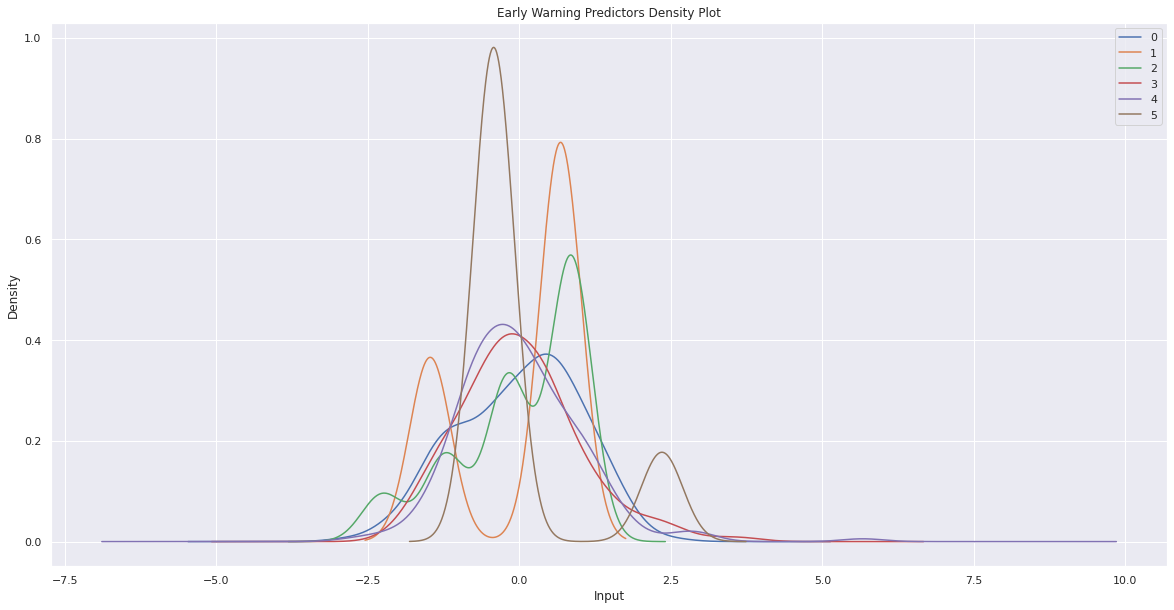

In [ ]:
#density plot of inputs
standard_early_warning_X_train_df.plot.density(figsize = (20, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Early Warning Predictors Density Plot")

Text(0.5, 1.0, 'Cardio Specific Predictors Density Plot')

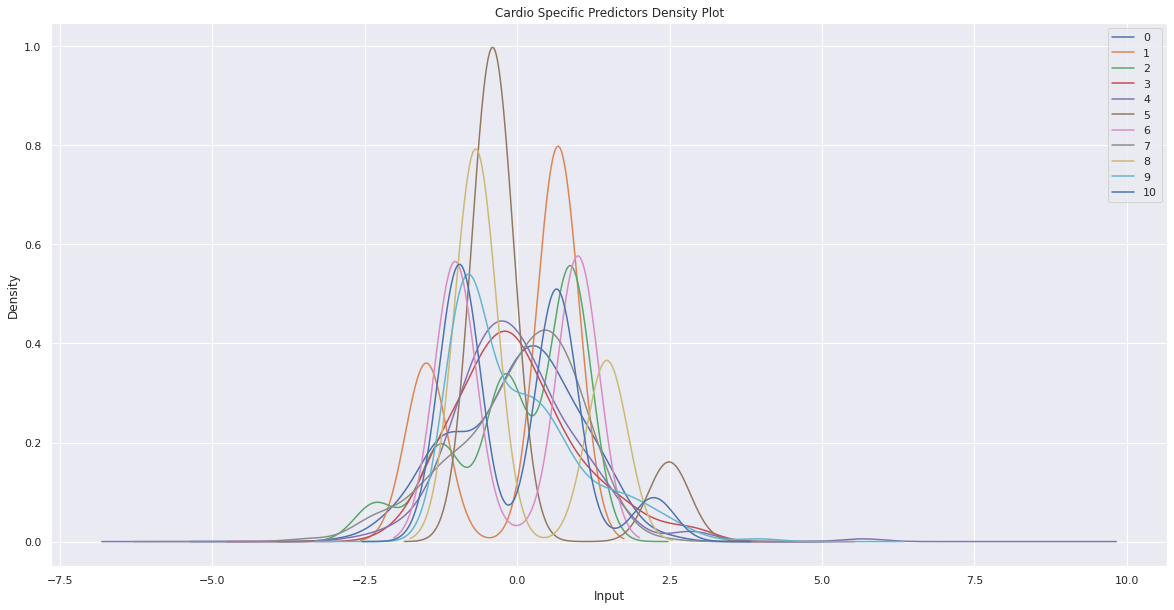

In [ ]:
#density plot of inputs
standard_cardio_specific_X_train_df.plot.density(figsize = (20, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Cardio Specific Predictors Density Plot")

Text(0.5, 1.0, 'Full Workup Predictors Density Plot')

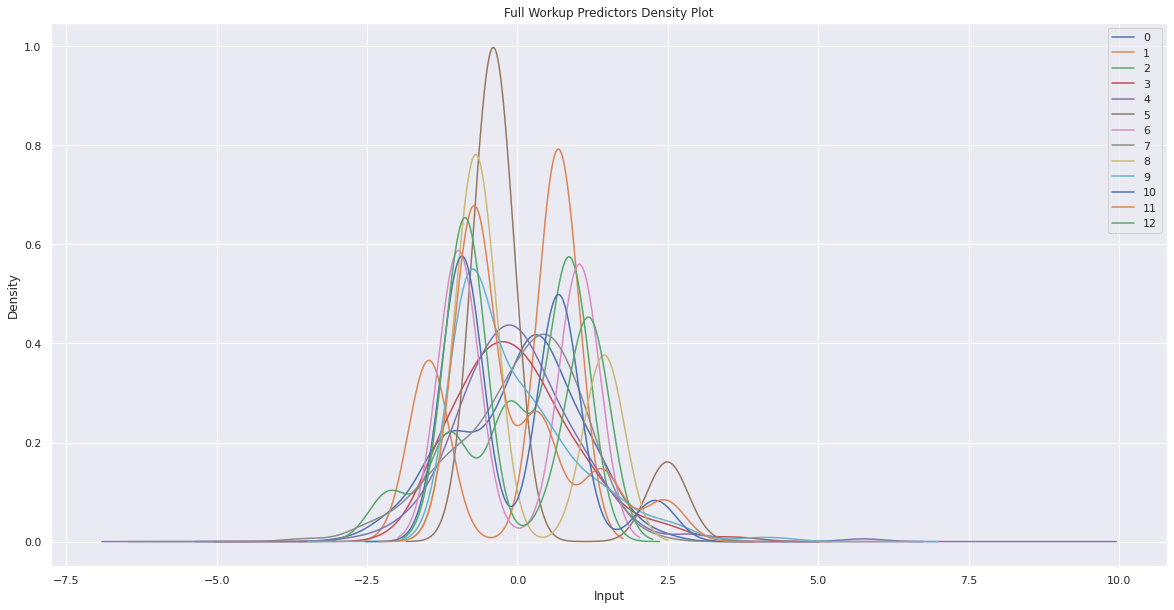

In [ ]:
#density plot of inputs
standard_full_workup_X_train_df.plot.density(figsize = (20, 10))#,linewidth = 4)
plt.xlabel("Input")
plt.title("Full Workup Predictors Density Plot")

#E - Modeling

## 1.0 Random Forest

###1.1 Early Warning Random Forest

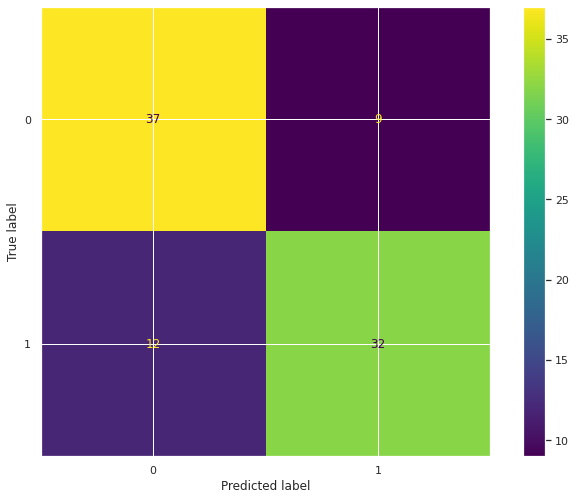

-----------------------------------------------------------------------------


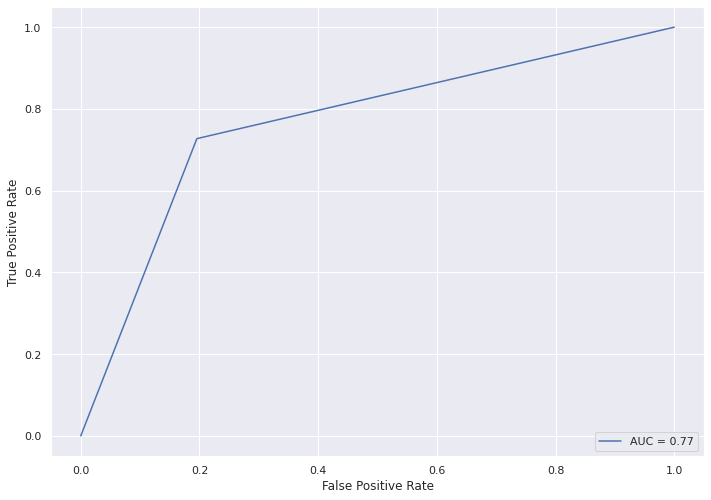

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        46
           1       0.78      0.73      0.75        44

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.75
CV Mean F1 Score: 0.73
CV Mean ROC AUC Score: 0.82
CV Mean Recall: 0.76


In [ ]:
#create model
rf = RandomForestClassifier()
rf.fit(standard_early_warning_X_train, early_warning_y_train)
early_warning_y_pred_rf = rf.predict(standard_early_warning_X_test)

early_warning_rf_test_roc_auc_score = roc_auc_score(early_warning_y_test, early_warning_y_pred_rf)

#create confusion matrix
confusion_matrix(early_warning_y_test, early_warning_y_pred_rf)
cm = confusion_matrix(early_warning_y_test, early_warning_y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')
#create ROC AUC graph
fpr, tpr, thresholds = metrics.roc_curve(early_warning_y_test, early_warning_y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

print('-----------------------------------------------------------------------------')
#create classification report
print(classification_report(early_warning_y_test, early_warning_y_pred_rf))

print('-----------------------------------------------------------------------------')
#get cross validation metrics
early_warning_rf_mean_roc_auc_score = np.mean(cross_val_score(rf, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='roc_auc'))
early_warning_rf_mean_accuracy_score = np.mean(cross_val_score(rf, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='accuracy'))
early_warning_rf_mean_f1_score = np.mean(cross_val_score(rf, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='f1'))
early_warning_rf_mean_recall_score = np.mean(cross_val_score(rf, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (early_warning_rf_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (early_warning_rf_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (early_warning_rf_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (early_warning_rf_mean_recall_score))

###1.2 Cardio Specific Random Forest

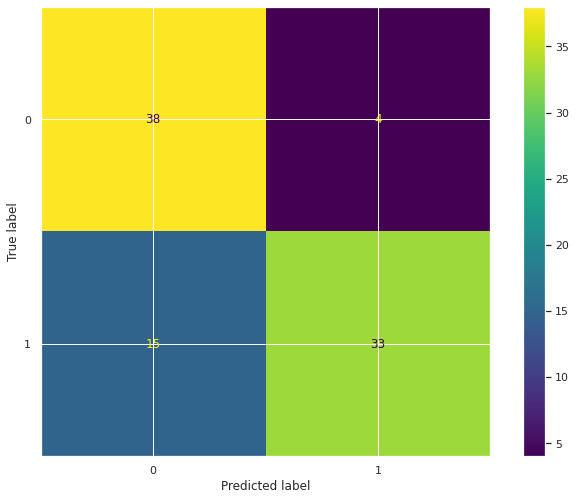

-----------------------------------------------------------------------------


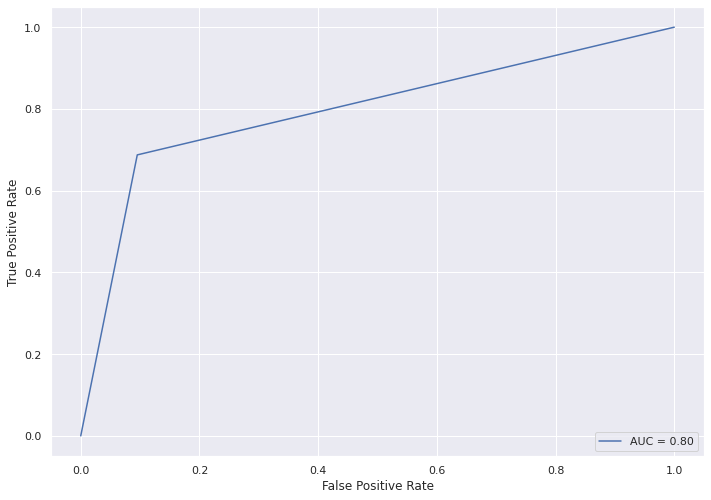

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        42
           1       0.89      0.69      0.78        48

    accuracy                           0.79        90
   macro avg       0.80      0.80      0.79        90
weighted avg       0.81      0.79      0.79        90

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.76
CV Mean F1 Score: 0.70
CV Mean ROC AUC Score: 0.83
CV Mean Recall: 0.71


In [ ]:
rf = RandomForestClassifier()
rf.fit(standard_cardio_specific_X_train, cardio_specific_y_train)
cardio_specific_y_pred_rf = rf.predict(standard_cardio_specific_X_test)

cardio_specific_rf_test_roc_auc_score = roc_auc_score(cardio_specific_y_test, cardio_specific_y_pred_rf)

#create confusion matrix
confusion_matrix(cardio_specific_y_test, cardio_specific_y_pred_rf)
cm = confusion_matrix(cardio_specific_y_test, cardio_specific_y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')
#create ROC AUC graph
fpr, tpr, thresholds = metrics.roc_curve(cardio_specific_y_test, cardio_specific_y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

print('-----------------------------------------------------------------------------')
#create classification report
print(classification_report(cardio_specific_y_test, cardio_specific_y_pred_rf))

print('-----------------------------------------------------------------------------')
#get cross validation metrics
cardio_specific_rf_mean_roc_auc_score = np.mean(cross_val_score(rf, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='roc_auc'))
cardio_specific_rf_mean_accuracy_score = np.mean(cross_val_score(rf, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='accuracy'))
cardio_specific_rf_mean_f1_score = np.mean(cross_val_score(rf, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='f1'))
cardio_specific_rf_mean_recall_score = np.mean(cross_val_score(rf, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (cardio_specific_rf_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (cardio_specific_rf_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (cardio_specific_rf_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (cardio_specific_rf_mean_recall_score))

###1.3 Full Workup Random Forest

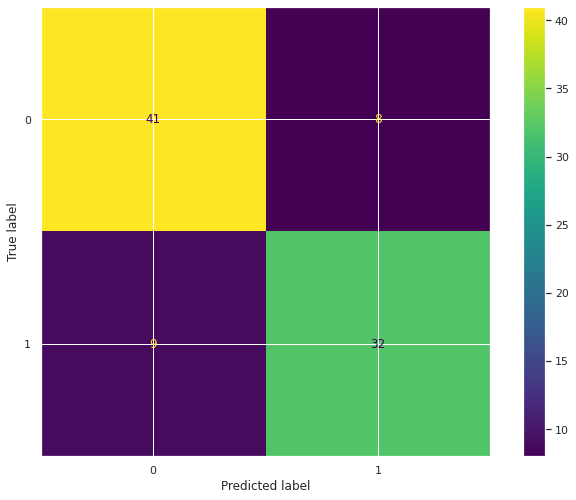

-----------------------------------------------------------------------------


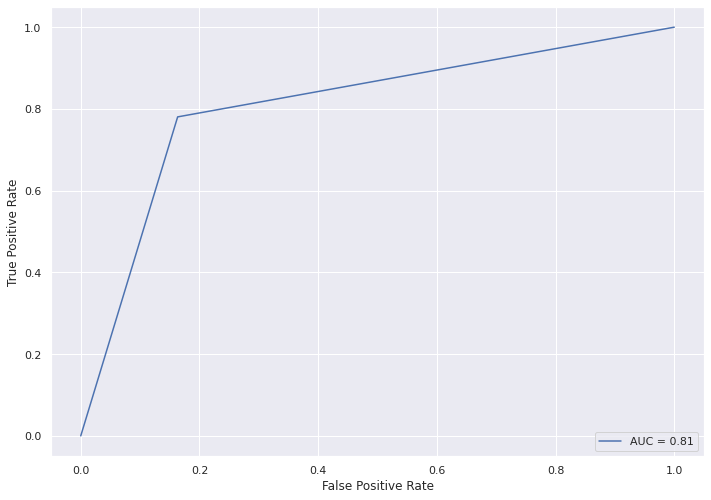

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        49
           1       0.80      0.78      0.79        41

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.86
CV Mean F1 Score: 0.83
CV Mean ROC AUC Score: 0.92
CV Mean Recall: 0.80


In [ ]:
#create model
rf = RandomForestClassifier()
rf.fit(standard_full_workup_X_train, full_workup_y_train)
full_workup_y_pred_rf = rf.predict(standard_full_workup_X_test)

full_workup_rf_test_roc_auc_score = roc_auc_score(full_workup_y_test, full_workup_y_pred_rf)

#create confusion matrix
confusion_matrix(full_workup_y_test, full_workup_y_pred_rf)
cm = confusion_matrix(full_workup_y_test, full_workup_y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')
#create ROC AUC graph
fpr, tpr, thresholds = metrics.roc_curve(full_workup_y_test, full_workup_y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

print('-----------------------------------------------------------------------------')
#create classification report
print(classification_report(full_workup_y_test, full_workup_y_pred_rf))

print('-----------------------------------------------------------------------------')
#get cross validation metrics
full_workup_rf_mean_roc_auc_score = np.mean(cross_val_score(rf, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='roc_auc'))
full_workup_rf_mean_accuracy_score = np.mean(cross_val_score(rf, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='accuracy'))
full_workup_rf_mean_f1_score = np.mean(cross_val_score(rf, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='f1'))
full_workup_rf_mean_recall_score = np.mean(cross_val_score(rf, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (full_workup_rf_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (full_workup_rf_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (full_workup_rf_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (full_workup_rf_mean_recall_score))

##2.0 Logistic Regression

###2.1 Early Warning Logistic Regression

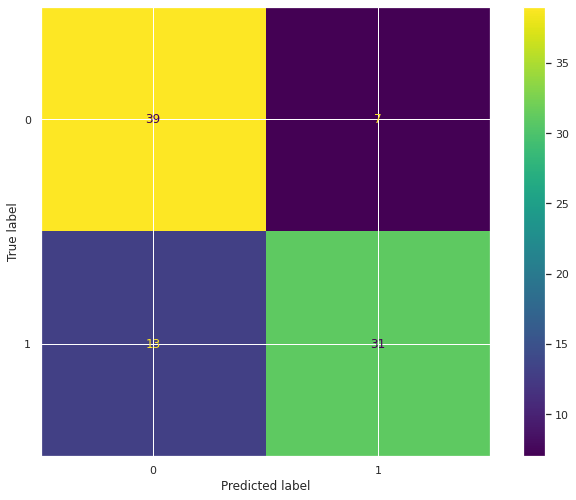

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        46
           1       0.82      0.70      0.76        44

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90

-----------------------------------------------------------------------------


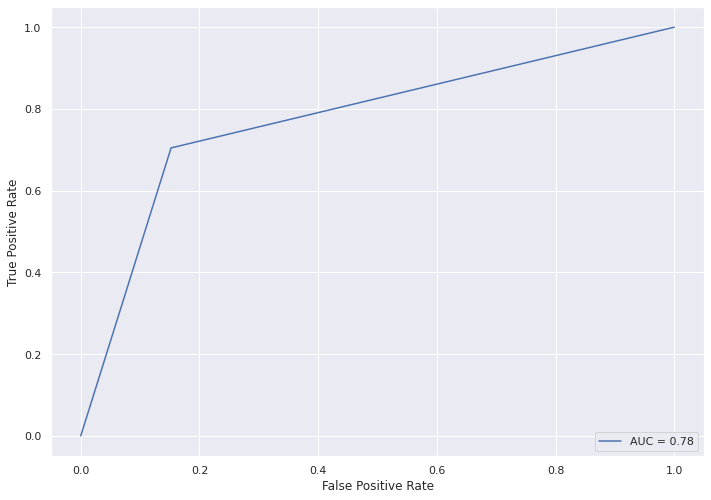

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.72
CV Mean F1 Score: 0.69
CV Mean ROC AUC Score: 0.80
CV Mean Recall: 0.68


In [ ]:
lr = LogisticRegression()
lr.fit(standard_early_warning_X_train, early_warning_y_train)
early_warning_y_pred_lr = lr.predict(standard_early_warning_X_test)

early_warning_lr_test_roc_auc_score = roc_auc_score(early_warning_y_test, early_warning_y_pred_lr)

confusion_matrix(early_warning_y_test, early_warning_y_pred_lr)
cm = confusion_matrix(early_warning_y_test, early_warning_y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(early_warning_y_test, early_warning_y_pred_lr))

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(early_warning_y_test, early_warning_y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

print('-----------------------------------------------------------------------------')

early_warning_lr_mean_roc_auc_score = np.mean(cross_val_score(lr, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='roc_auc'))
early_warning_lr_mean_accuracy_score = np.mean(cross_val_score(lr, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='accuracy'))
early_warning_lr_mean_f1_score = np.mean(cross_val_score(lr, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='f1'))
early_warning_lr_mean_recall_score = np.mean(cross_val_score(lr, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (early_warning_lr_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (early_warning_lr_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (early_warning_lr_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (early_warning_lr_mean_recall_score))

###2.2 Cardio Specific Logistic Regression

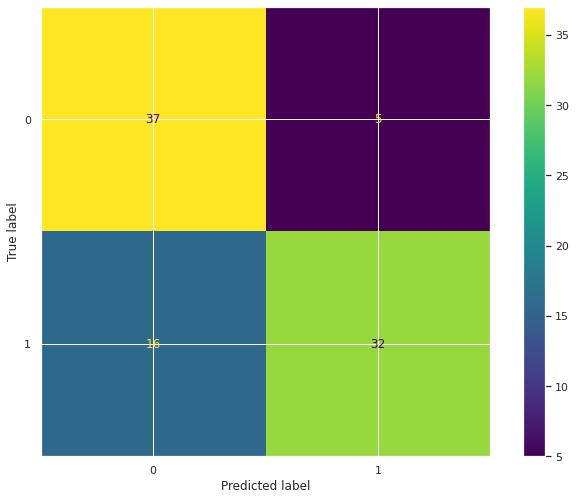

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        42
           1       0.86      0.67      0.75        48

    accuracy                           0.77        90
   macro avg       0.78      0.77      0.77        90
weighted avg       0.79      0.77      0.77        90

-----------------------------------------------------------------------------


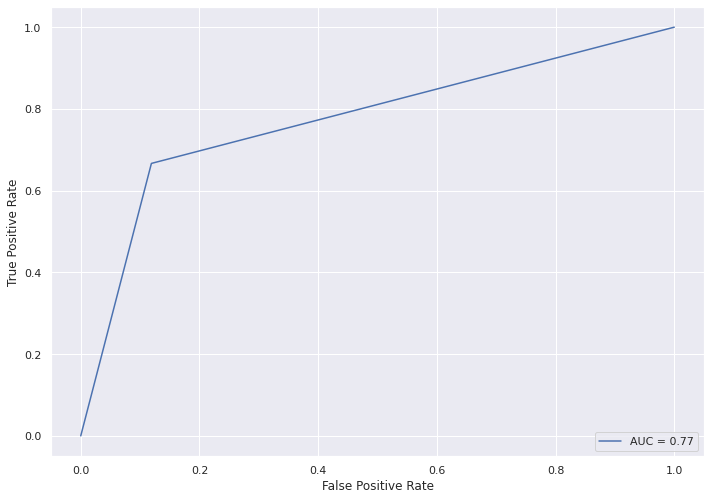

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.80
CV Mean F1 Score: 0.76
CV Mean ROC AUC Score: 0.84
CV Mean Recall: 0.73


In [ ]:
lr = LogisticRegression()
lr.fit(standard_cardio_specific_X_train, cardio_specific_y_train)
cardio_specific_y_pred_lr = lr.predict(standard_cardio_specific_X_test)

cardio_specific_lr_test_roc_auc_score = roc_auc_score(cardio_specific_y_test, cardio_specific_y_pred_lr)

confusion_matrix(cardio_specific_y_test, cardio_specific_y_pred_lr)
cm = confusion_matrix(cardio_specific_y_test, cardio_specific_y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(cardio_specific_y_test, cardio_specific_y_pred_lr))

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(cardio_specific_y_test, cardio_specific_y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

print('-----------------------------------------------------------------------------')

cardio_specific_lr_mean_roc_auc_score = np.mean(cross_val_score(lr, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='roc_auc'))
cardio_specific_lr_mean_accuracy_score = np.mean(cross_val_score(lr, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='accuracy'))
cardio_specific_lr_mean_f1_score = np.mean(cross_val_score(lr, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='f1'))
cardio_specific_lr_mean_recall_score = np.mean(cross_val_score(lr, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (cardio_specific_lr_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (cardio_specific_lr_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (cardio_specific_lr_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (cardio_specific_lr_mean_recall_score))

###2.3 Full Workup Logistic Regression

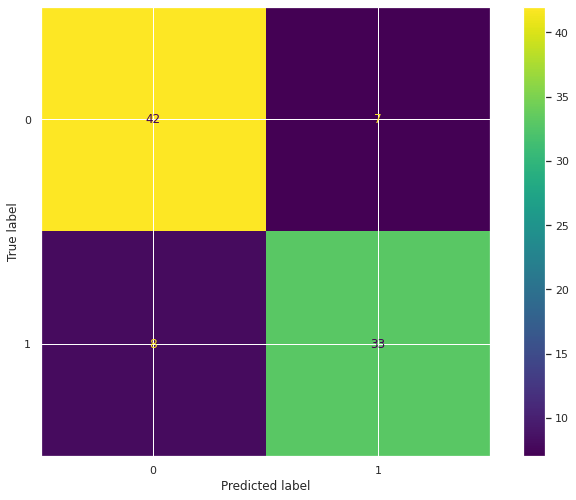

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        49
           1       0.82      0.80      0.81        41

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

-----------------------------------------------------------------------------


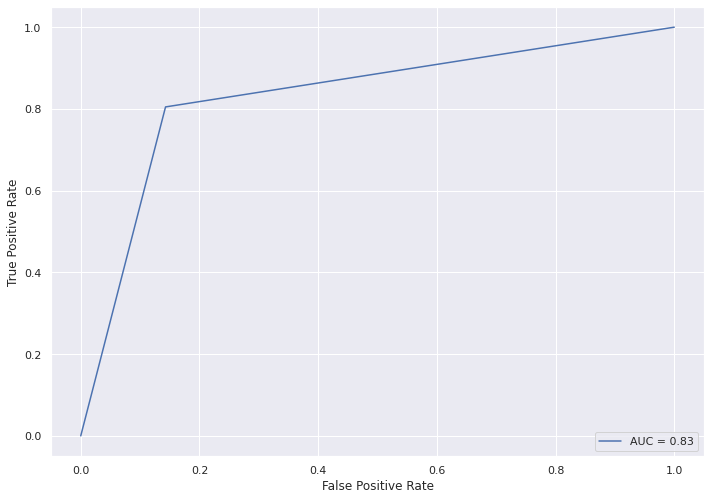

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.85
CV Mean F1 Score: 0.83
CV Mean ROC AUC Score: 0.92
CV Mean Recall: 0.83
0.8310104529616725


In [ ]:
lr = LogisticRegression()
lr.fit(standard_full_workup_X_train, full_workup_y_train)
full_workup_y_pred_lr = lr.predict(standard_full_workup_X_test)

full_workup_lr_test_roc_auc_score = roc_auc_score(full_workup_y_test, full_workup_y_pred_lr)

confusion_matrix(full_workup_y_test, full_workup_y_pred_lr)
cm = confusion_matrix(full_workup_y_test, full_workup_y_pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(full_workup_y_test, full_workup_y_pred_lr))

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(full_workup_y_test, full_workup_y_pred_lr)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

print('-----------------------------------------------------------------------------')

full_workup_lr_mean_roc_auc_score = np.mean(cross_val_score(lr, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='roc_auc'))
full_workup_lr_mean_accuracy_score = np.mean(cross_val_score(lr, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='accuracy'))
full_workup_lr_mean_f1_score = np.mean(cross_val_score(lr, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='f1'))
full_workup_lr_mean_recall_score = np.mean(cross_val_score(lr, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (full_workup_lr_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (full_workup_lr_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (full_workup_lr_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (full_workup_lr_mean_recall_score))


print(roc_auc_score(full_workup_y_test, full_workup_y_pred_lr))

##3.0 Naive Bayes

###3.1 Early Warning Naive Bayes

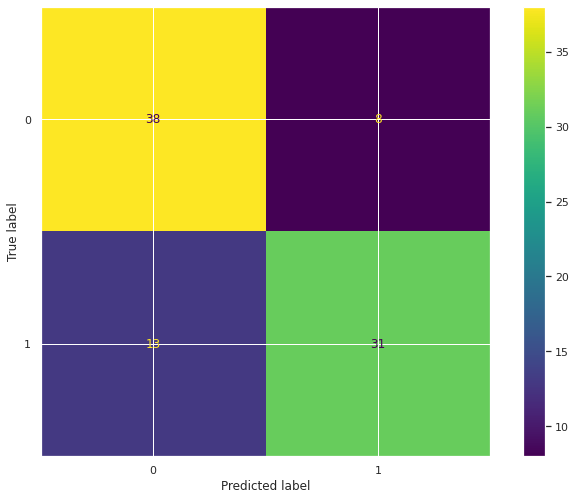

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.83      0.78        46
           1       0.79      0.70      0.75        44

    accuracy                           0.77        90
   macro avg       0.77      0.77      0.77        90
weighted avg       0.77      0.77      0.77        90

-----------------------------------------------------------------------------


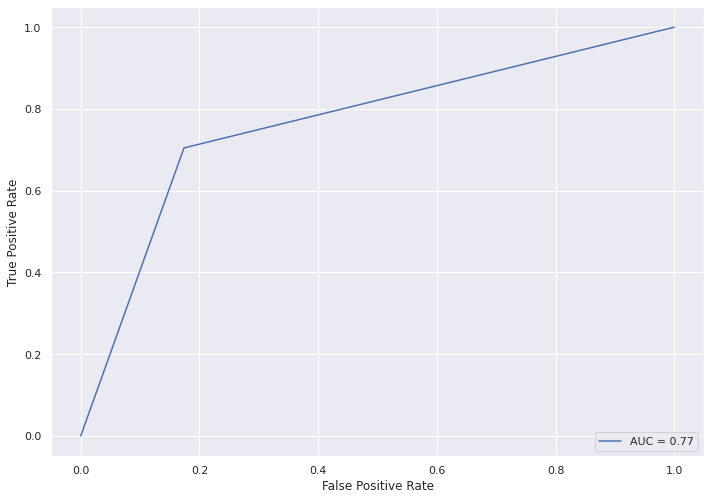

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.70
CV Mean F1 Score: 0.67
CV Mean ROC AUC Score: 0.76
CV Mean Recall: 0.66


In [ ]:
gnb = GaussianNB()
gnb.fit(standard_early_warning_X_train, early_warning_y_train)
early_warning_y_pred_gnb = gnb.predict(standard_early_warning_X_test)

early_warning_gnb_test_roc_auc_score = roc_auc_score(early_warning_y_test, early_warning_y_pred_gnb)

confusion_matrix(early_warning_y_test, early_warning_y_pred_gnb)
cm = confusion_matrix(early_warning_y_test, early_warning_y_pred_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(early_warning_y_test, early_warning_y_pred_gnb))

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(early_warning_y_test, early_warning_y_pred_gnb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

print('-----------------------------------------------------------------------------')

early_warning_gnb_mean_roc_auc_score = np.mean(cross_val_score(gnb, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='roc_auc'))
early_warning_gnb_mean_accuracy_score = np.mean(cross_val_score(gnb, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='accuracy'))
early_warning_gnb_mean_f1_score = np.mean(cross_val_score(gnb, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='f1'))
early_warning_gnb_mean_recall_score = np.mean(cross_val_score(gnb, standard_early_warning_X_train, early_warning_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (early_warning_gnb_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (early_warning_gnb_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (early_warning_gnb_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (early_warning_gnb_mean_recall_score))

###3.2 Cardio Specific Naive Bayes

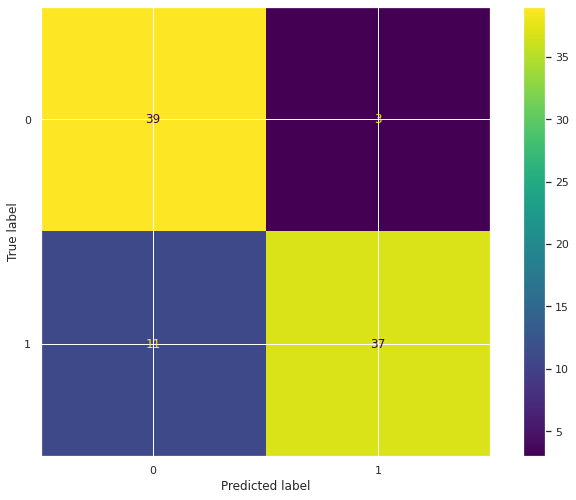

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        42
           1       0.93      0.77      0.84        48

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.86      0.84      0.84        90

-----------------------------------------------------------------------------


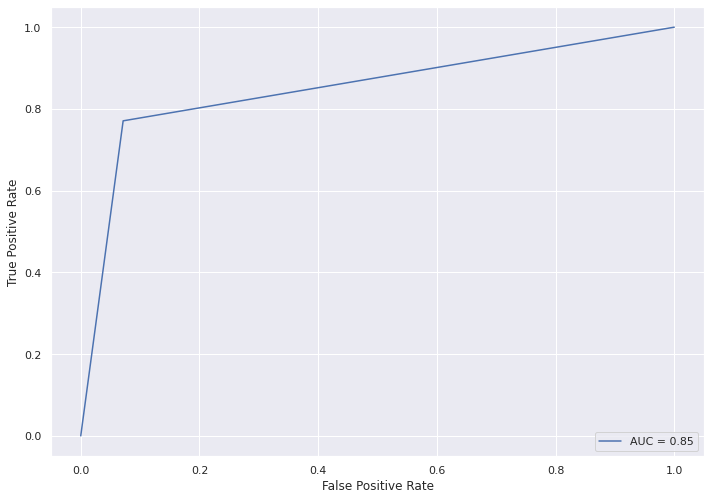

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.78
CV Mean F1 Score: 0.74
CV Mean ROC AUC Score: 0.84
CV Mean Recall: 0.72


In [ ]:
gnb = GaussianNB()
gnb.fit(standard_cardio_specific_X_train, cardio_specific_y_train)
cardio_specific_y_pred_gnb = gnb.predict(standard_cardio_specific_X_test)

cardio_specific_gnb_test_roc_auc_score = roc_auc_score(cardio_specific_y_test, cardio_specific_y_pred_gnb)

confusion_matrix(cardio_specific_y_test, cardio_specific_y_pred_gnb)
cm = confusion_matrix(cardio_specific_y_test, cardio_specific_y_pred_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(cardio_specific_y_test, cardio_specific_y_pred_gnb))

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(cardio_specific_y_test, cardio_specific_y_pred_gnb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

print('-----------------------------------------------------------------------------')

cardio_specific_gnb_mean_roc_auc_score = np.mean(cross_val_score(gnb, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='roc_auc'))
cardio_specific_gnb_mean_accuracy_score = np.mean(cross_val_score(gnb, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='accuracy'))
cardio_specific_gnb_mean_f1_score = np.mean(cross_val_score(gnb, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='f1'))
cardio_specific_gnb_mean_recall_score = np.mean(cross_val_score(gnb, standard_cardio_specific_X_train, cardio_specific_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (cardio_specific_gnb_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (cardio_specific_gnb_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (cardio_specific_gnb_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (cardio_specific_gnb_mean_recall_score))

###3.3 Full Workup Naive Bayes

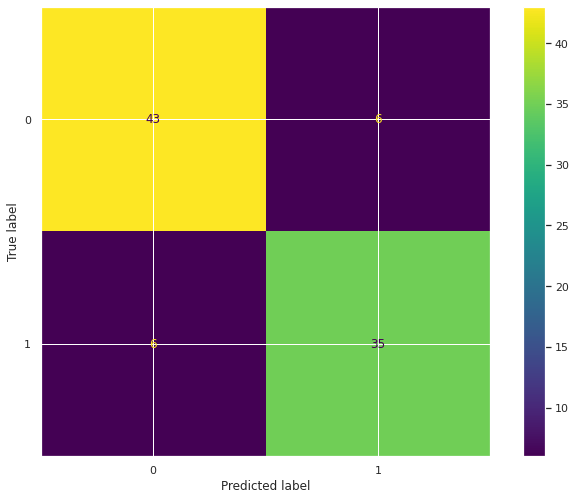

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        49
           1       0.85      0.85      0.85        41

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

-----------------------------------------------------------------------------


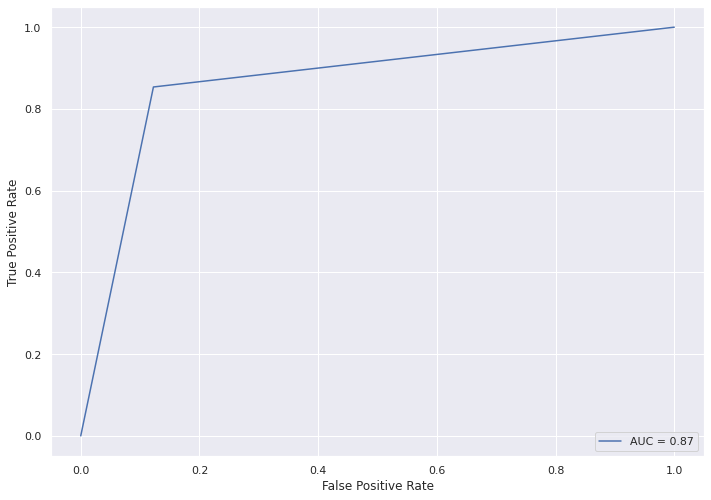

-----------------------------------------------------------------------------
CV Mean Accuracy: 0.84
CV Mean F1 Score: 0.82
CV Mean ROC AUC Score: 0.90
CV Mean Recall: 0.82


In [ ]:
gnb = GaussianNB()
gnb.fit(standard_full_workup_X_train, full_workup_y_train)
full_workup_y_pred_gnb = gnb.predict(standard_full_workup_X_test)

full_workup_gnb_test_roc_auc_score = roc_auc_score(full_workup_y_test, full_workup_y_pred_gnb)

confusion_matrix(full_workup_y_test, full_workup_y_pred_gnb)
cm = confusion_matrix(full_workup_y_test, full_workup_y_pred_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(full_workup_y_test, full_workup_y_pred_gnb))

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(full_workup_y_test, full_workup_y_pred_gnb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

print('-----------------------------------------------------------------------------')

full_workup_gnb_mean_roc_auc_score = np.mean(cross_val_score(gnb, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='roc_auc'))
full_workup_gnb_mean_accuracy_score = np.mean(cross_val_score(gnb, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='accuracy'))
full_workup_gnb_mean_f1_score = np.mean(cross_val_score(gnb, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='f1'))
full_workup_gnb_mean_recall_score = np.mean(cross_val_score(gnb, standard_full_workup_X_train, full_workup_y_train, cv=5, scoring='recall'))

print("CV Mean Accuracy: %0.2f" % (full_workup_gnb_mean_accuracy_score))
print("CV Mean F1 Score: %0.2f" % (full_workup_gnb_mean_f1_score))
print("CV Mean ROC AUC Score: %0.2f" % (full_workup_gnb_mean_roc_auc_score))
print("CV Mean Recall: %0.2f" % (full_workup_gnb_mean_recall_score))

##4.0 Model Comparison

In [ ]:
#store metrics in respective lists
accuracy = [early_warning_rf_mean_accuracy_score, cardio_specific_rf_mean_accuracy_score, full_workup_rf_mean_accuracy_score,early_warning_lr_mean_accuracy_score, cardio_specific_lr_mean_accuracy_score, full_workup_lr_mean_accuracy_score, early_warning_gnb_mean_accuracy_score, cardio_specific_gnb_mean_accuracy_score, full_workup_gnb_mean_accuracy_score ]
f1_score = [early_warning_rf_mean_f1_score, cardio_specific_rf_mean_f1_score, full_workup_rf_mean_f1_score, early_warning_lr_mean_f1_score, cardio_specific_lr_mean_f1_score, full_workup_lr_mean_f1_score, early_warning_gnb_mean_f1_score, cardio_specific_gnb_mean_f1_score, full_workup_gnb_mean_f1_score]
roc_auc = [early_warning_rf_mean_roc_auc_score, cardio_specific_rf_mean_roc_auc_score, full_workup_rf_mean_roc_auc_score, early_warning_lr_mean_roc_auc_score, cardio_specific_lr_mean_roc_auc_score, full_workup_lr_mean_roc_auc_score, early_warning_gnb_mean_roc_auc_score, cardio_specific_gnb_mean_roc_auc_score, full_workup_gnb_mean_roc_auc_score]
recall = [early_warning_rf_mean_recall_score, cardio_specific_rf_mean_recall_score, full_workup_rf_mean_recall_score, early_warning_lr_mean_recall_score, cardio_specific_lr_mean_recall_score, full_workup_rf_mean_recall_score, early_warning_gnb_mean_recall_score, cardio_specific_gnb_mean_recall_score, full_workup_gnb_mean_recall_score]
test_roc_auc = [early_warning_rf_test_roc_auc_score, cardio_specific_rf_test_roc_auc_score, full_workup_rf_test_roc_auc_score, early_warning_lr_test_roc_auc_score, cardio_specific_lr_test_roc_auc_score, full_workup_lr_test_roc_auc_score, early_warning_gnb_test_roc_auc_score, cardio_specific_gnb_test_roc_auc_score, full_workup_gnb_test_roc_auc_score]
models = ['early warning rf','cardio specific rf','full workup rf','early warning lr','cardio specific lr','full workup lr', 'early warning gnb','cardio specific gnb','full workup gnb']


#create dataframe with metrics for comparison
df_evaluate = pd.DataFrame()
df_evaluate['Model'] = models
df_evaluate['CV Mean Accuracy'] = accuracy
df_evaluate['CV Mean F1 Score'] = f1_score
df_evaluate['CV Mean Recall'] = recall
df_evaluate['CV Mean ROC AUC'] = roc_auc
df_evaluate['Test ROC AUC'] = test_roc_auc

df_evaluate = df_evaluate.sort_values(by=['CV Mean ROC AUC'], ascending='False')
df_evaluate

,Model,CV Mean Accuracy,CV Mean F1 Score,CV Mean Recall,CV Mean ROC AUC,Test ROC AUC
6,early warning gnb,0.704181,0.669397,0.663158,0.761556,0.765316
3,early warning lr,0.722997,0.686040,0.684211,0.800811,0.776186
0,early warning rf,0.746690,0.727763,0.757895,0.817547,0.765810
1,cardio specific rf,0.760743,0.696643,0.705263,0.830917,0.796131
4,cardio specific lr,0.799071,0.756029,0.727485,0.841207,0.773810
7,cardio specific gnb,0.775377,0.736806,0.715205,0.844141,0.849702
8,full workup gnb,0.837398,0.822216,0.816316,0.901030,0.865605
5,full workup lr,0.846690,0.832695,0.795263,0.915195,0.831010
2,full workup rf,0.855981,0.826989,0.795263,0.919609,0.808611


Observing the model comparison table, the following conclusions can be drawn:
*   The full workup models tended to perform better than the cardio specific models, which tended to perform better than the early warning models
*   The increased recall scores in the full workup models set them apart from the rest of the models. Recall is critically important in this context, as we want the model to catch as many true positive cases as possible. Mislabeling a true positive as a negative could result in worse patient outcomes.

The early warning rf model, cardio specific gnb, and full workup gnb models will be studied further given their combination of high cross validation and test scores


##5.0 Model Hyperparameter Tuning

Hyperparameter tuning is performed on the early warning rf model in an attempt to improve performance. The cardio specific and full workup models do not have hyperparameters to tune, given they are naive bayes models.

In [ ]:
# Grid search cross validation
params = {
'n_estimators': [10, 25, 50, 100, 200], 
'criterion': ['gini', 'entropy'], 
'max_depth': [3, 5, 10, 15, 20, 25, None], 
'min_samples_leaf': [1, 2, 5, 10]
}

#create and fit model
rf=RandomForestClassifier()
gs = GridSearchCV(estimator=rf, param_grid=params, scoring='roc_auc', cv=5)
gs.fit(standard_early_warning_X_train,early_warning_y_train)

#get best parameters and score
print("best parameters:",gs.best_params_)
print("best roc auc score:",gs.best_score_)

#predict using best estimator from grid search
gs_y_pred = gs.best_estimator_.predict(standard_early_warning_X_test)
print("Test ROC AUC Score:", roc_auc_score(early_warning_y_test, gs_y_pred))

best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
best roc auc score: 0.840378614520491
Test ROC AUC Score: 0.7766798418972332


Observing the hyperparameter tuning, the test roc auc score for the early warning rf model was marginally improved using tuned hyperparameters.

#F - Final Models

The best performing model from each predictor set are compared after hyperparameter tuning, if applicable

##Early Warning Random Forest

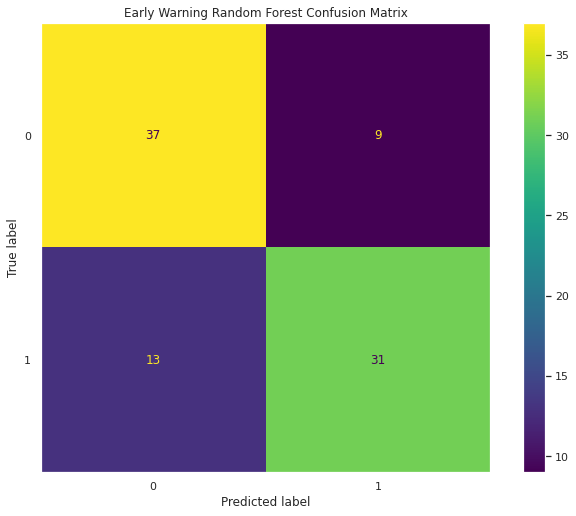

-----------------------------------------------------------------------------


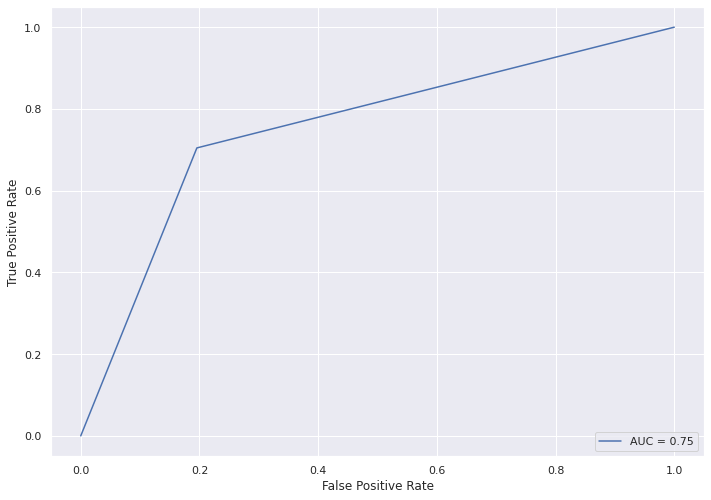

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        46
           1       0.78      0.70      0.74        44

    accuracy                           0.76        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.76      0.76      0.75        90



In [ ]:
rf = RandomForestClassifier(criterion='entropy',max_depth=20,min_samples_leaf=2,n_estimators=100)
rf.fit(standard_early_warning_X_train, early_warning_y_train)
final_early_warning_y_pred_rf = rf.predict(standard_early_warning_X_test)

final_early_warning_rf_test_roc_auc_score = roc_auc_score(early_warning_y_test, final_early_warning_y_pred_rf)
final_early_warning_rf_test_accuracy = accuracy_score(early_warning_y_test, final_early_warning_y_pred_rf)
final_early_warning_rf_test_recall = recall_score(early_warning_y_test, final_early_warning_y_pred_rf)

confusion_matrix(early_warning_y_test, final_early_warning_y_pred_rf)
cm = confusion_matrix(early_warning_y_test, final_early_warning_y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.grid(False)
disp.ax_.set_title("Early Warning Random Forest Confusion Matrix")
plt.show()

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(early_warning_y_test, final_early_warning_y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(early_warning_y_test, final_early_warning_y_pred_rf))


##Naive Bayes Cardio Specific

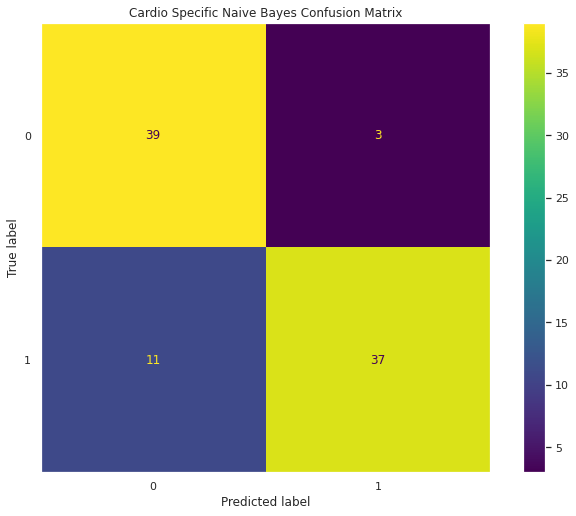

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        42
           1       0.93      0.77      0.84        48

    accuracy                           0.84        90
   macro avg       0.85      0.85      0.84        90
weighted avg       0.86      0.84      0.84        90

-----------------------------------------------------------------------------


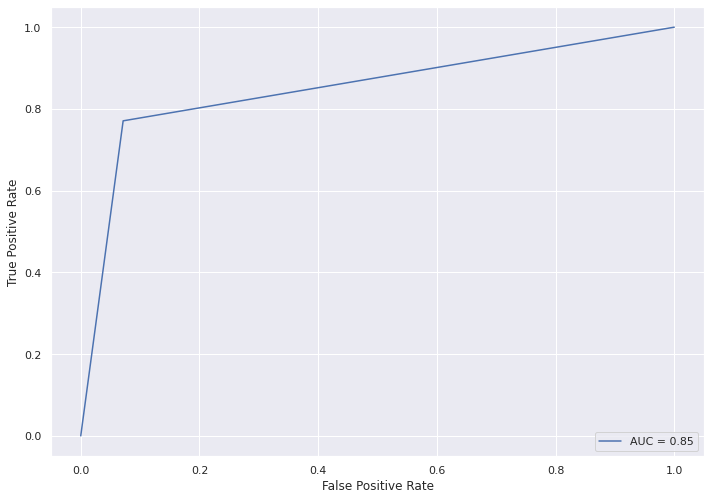

In [ ]:
gnb = GaussianNB()
gnb.fit(standard_cardio_specific_X_train, cardio_specific_y_train)
cardio_specific_y_pred_gnb = gnb.predict(standard_cardio_specific_X_test)

final_cardio_specific_gnb_test_roc_auc_score = roc_auc_score(cardio_specific_y_test, cardio_specific_y_pred_gnb)
final_cardio_specific_gnb_test_accuracy = accuracy_score(cardio_specific_y_test, cardio_specific_y_pred_gnb)
final_cardio_specific_gnb_test_recall = recall_score(cardio_specific_y_test, cardio_specific_y_pred_gnb)

confusion_matrix(cardio_specific_y_test, cardio_specific_y_pred_gnb)
cm = confusion_matrix(cardio_specific_y_test, cardio_specific_y_pred_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.grid(False)
disp.ax_.set_title("Cardio Specific Naive Bayes Confusion Matrix")
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(cardio_specific_y_test, cardio_specific_y_pred_gnb))

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(cardio_specific_y_test, cardio_specific_y_pred_gnb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

##Naive Bayes Full Workup

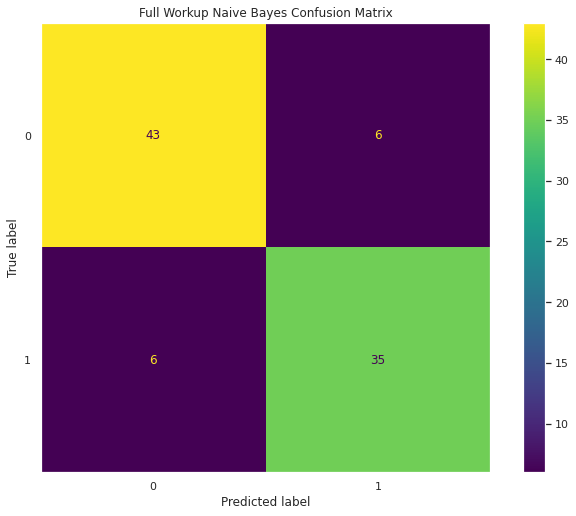

-----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        49
           1       0.85      0.85      0.85        41

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

-----------------------------------------------------------------------------


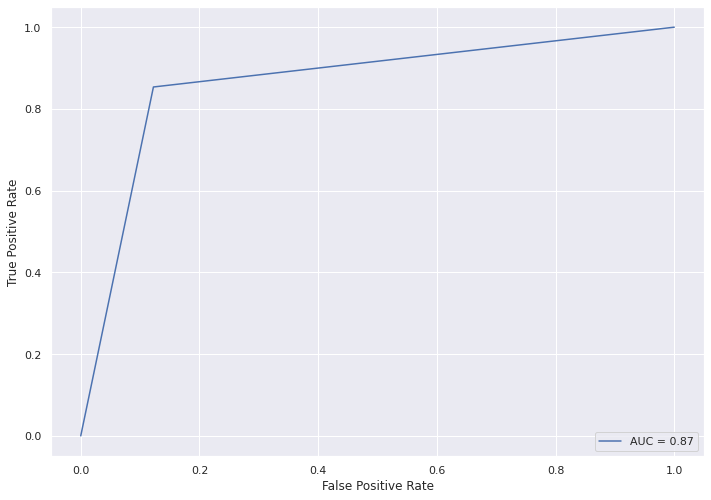

In [ ]:
gnb = GaussianNB()
gnb.fit(standard_full_workup_X_train, full_workup_y_train)
full_workup_y_pred_gnb = gnb.predict(standard_full_workup_X_test)

final_full_workup_gnb_test_roc_auc_score = roc_auc_score(full_workup_y_test, full_workup_y_pred_gnb)
final_full_workup_gnb_test_accuracy = accuracy_score(full_workup_y_test, full_workup_y_pred_gnb)
final_full_workup_gnb_test_recall = recall_score(full_workup_y_test, full_workup_y_pred_gnb)

confusion_matrix(full_workup_y_test, full_workup_y_pred_gnb)
cm = confusion_matrix(full_workup_y_test, full_workup_y_pred_gnb, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.grid(False)
disp.ax_.set_title("Full Workup Naive Bayes Confusion Matrix")
plt.show()

print('-----------------------------------------------------------------------------')

print(classification_report(full_workup_y_test, full_workup_y_pred_gnb))

print('-----------------------------------------------------------------------------')

fpr, tpr, thresholds = metrics.roc_curve(full_workup_y_test, full_workup_y_pred_gnb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

plt.show()

##Final Model Comparison

In [ ]:
#store metrics in respective lists
final_models = ['early warning rf','cardio specific gnb','full workup gnb']
final_accuracy = [final_early_warning_rf_test_accuracy, final_cardio_specific_gnb_test_accuracy, final_full_workup_gnb_test_accuracy]
final_recall = [final_early_warning_rf_test_recall, final_cardio_specific_gnb_test_recall, final_full_workup_gnb_test_recall]
final_roc_auc = [final_early_warning_rf_test_roc_auc_score, final_cardio_specific_gnb_test_roc_auc_score, final_full_workup_gnb_test_roc_auc_score]

#create dataframe with metrics for comparison
df__final_evaluate = pd.DataFrame()
df__final_evaluate['Model'] = final_models
df__final_evaluate['Accuracy'] = final_accuracy
df__final_evaluate['Recall'] = final_recall
df__final_evaluate['ROC AUC'] = final_roc_auc

df_evaluate = df__final_evaluate.sort_values(by=['ROC AUC'], ascending='False')
df_evaluate

,Model,Accuracy,Recall,ROC AUC
0,early warning rf,0.788889,0.750000,0.788043
1,cardio specific gnb,0.844444,0.770833,0.849702
2,full workup gnb,0.866667,0.853659,0.865605


#G - Conclusion

Comparing the final models, it can be observed that the cardio specific and full workup models greatly outperform the early warning model in accuracy, recall, and ROC AUC. Based on these results, it is likely worth investing in the more advanced and invasive procedures represented in the cardio specific and full workup predictor sets to predict the presence of heart disease. Perhaps the early warning model is best used as a screening process in which the outcome encourages patients to get further testing done.